In [1]:
!pip install scProject -U
import random
random.seed(a=613)
import numpy as np
import scProject
import scanpy as sc

patterns = sc.read('hretinaPatterns.csv')
dataset = sc.read_h5ad('test_target.h5ad')
dataset.X[dataset.X<0] = 0
scProject.matcher.orthologMapper(dataset, 'gene_map.csv','Mouse gene stable ID','Gene stable ID', 'gene_id')
dataset_filtered, patterns_filtered = scProject.matcher.filterAnnDatas(dataset, patterns.transpose(), 'gene_id')

Requirement already up-to-date: scProject in /Users/asherbaraban/opt/anaconda3/lib/python3.7/site-packages (1.0.9.8995)
(55371, 348) dataset filter shape
(97, 348) patterns filter shape


Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.


A layer named 'log' has been added to your filtered dataset
Regressing on loglayer of dataset_filtered


/Users/asherbaraban/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  tol, rng, random, positive)


(55371, 97)
[DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, Vascular Endothelium, ..., Cycling Neural Progenitor, Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]
Length: 12
Categories (12, object): [DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, ..., Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]


/Users/asherbaraban/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


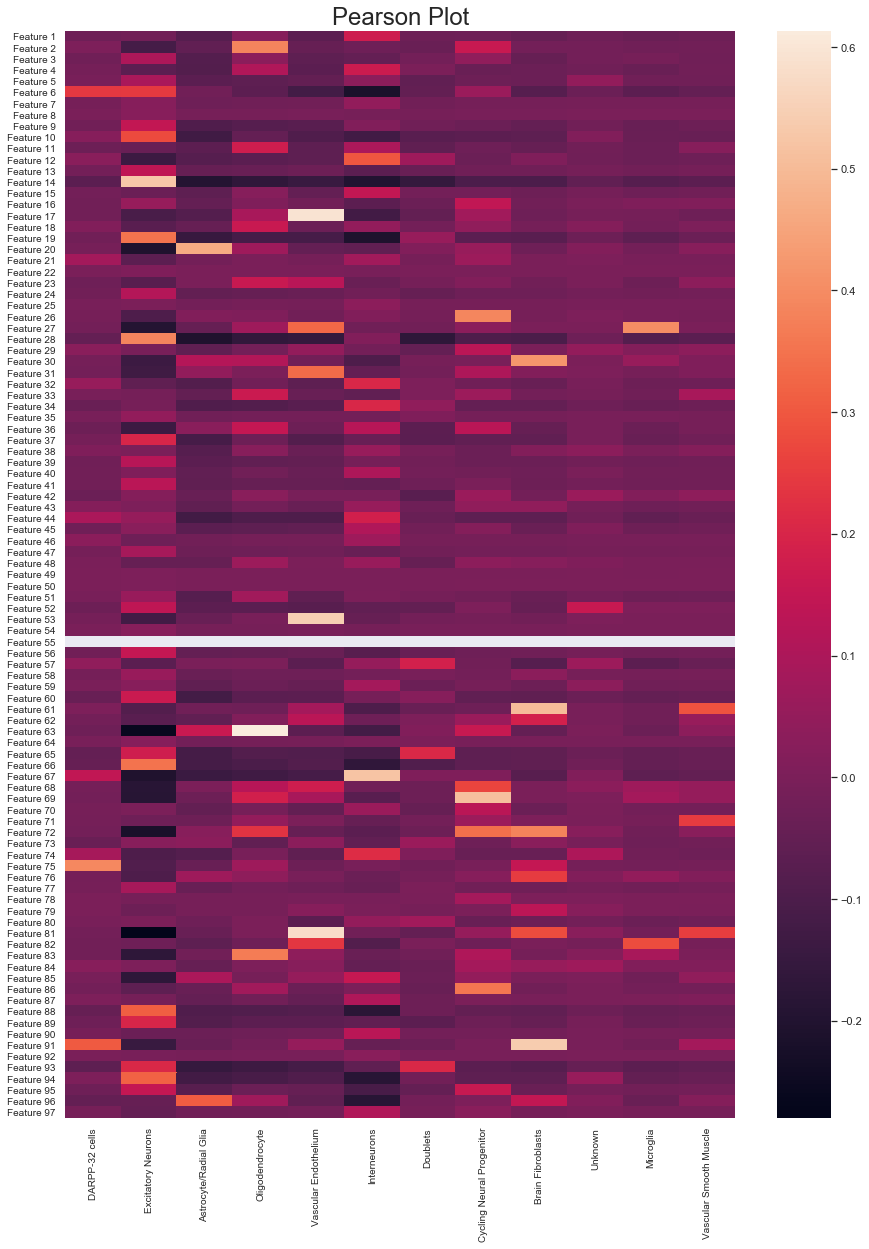

In [46]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= [15, 20]
dataset_filtered = scProject.matcher.logTransform(dataset_filtered)
scProject.rg.NNLR_ElasticNet(dataset_filtered, patterns_filtered, 'GV01', .00001, .9, layer='log', iterations=1000000)
scProject.viz.pearsonMatrix(dataset_filtered, patterns_filtered, 'CellType', 12, 'GV01', 'GV01Pears', True, xtickSize=10, ytickSize=10, row_cluster=False, col_cluster=False)

[DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, Vascular Endothelium, ..., Cycling Neural Progenitor, Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]
Length: 12
Categories (12, object): [DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, ..., Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]


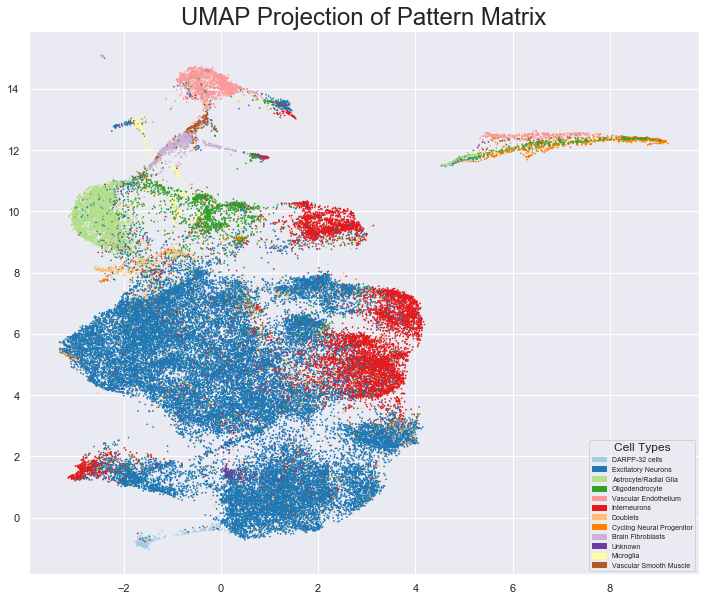

In [47]:
plt.rcParams['figure.figsize']= [12, 10]
scProject.viz.UMAP_Projection(dataset_filtered, 'CellType', 'GV01', 'UMAPMG01', 20)

(33678, 97)
Number of nonzero cells 10895


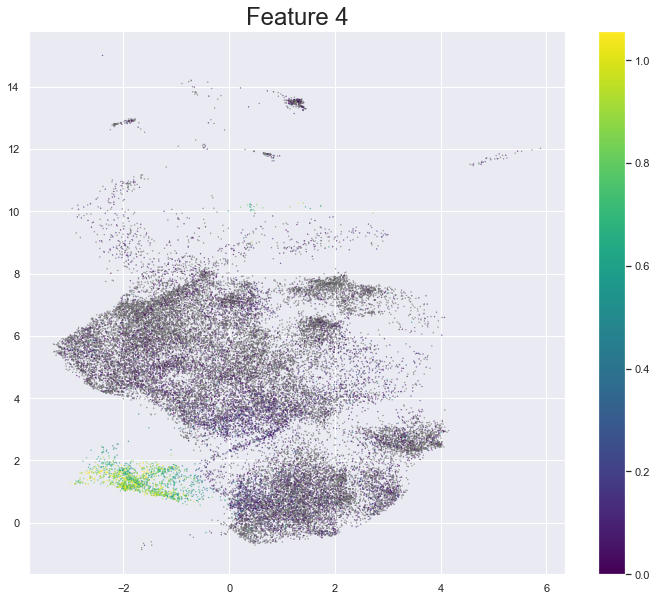

Number of nonzero cells 4585


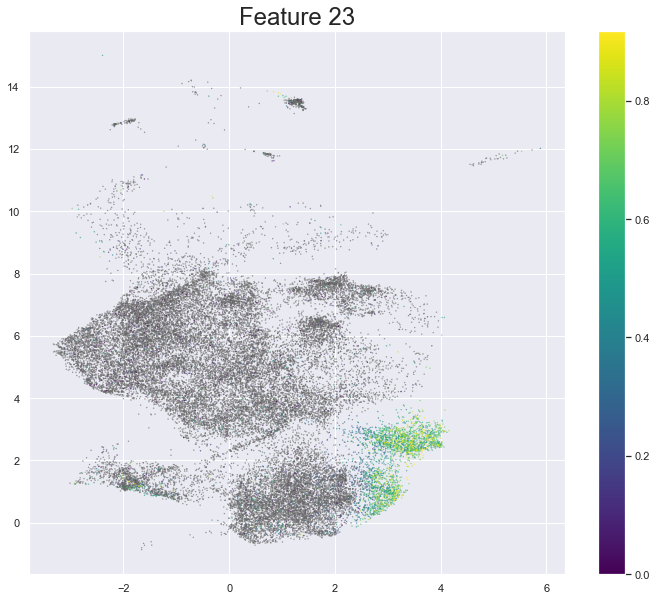

In [49]:
plt.rcParams['figure.figsize']= [12, 10]
scProject.viz.featurePlots(dataset_filtered, [4, 23], 'GV01', 'UMAPMG01', subset=['Excitatory Neurons'], obsColumn='CellType')


This subset has shape: (33678, 348)


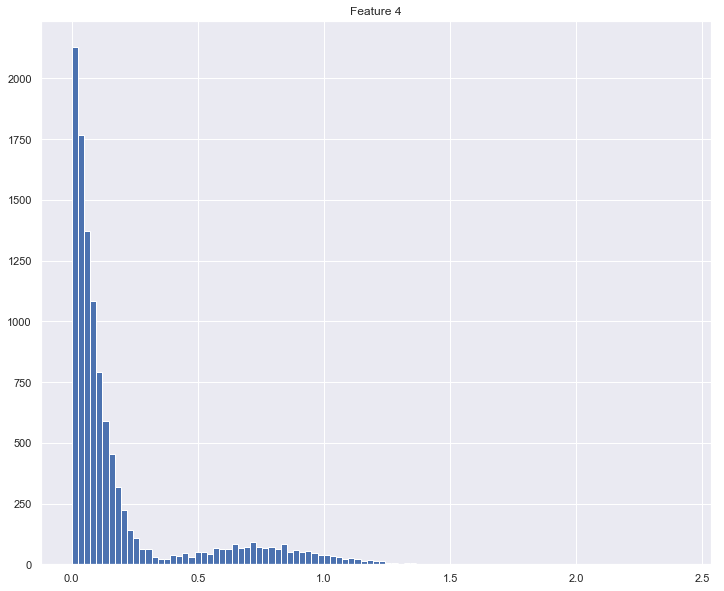

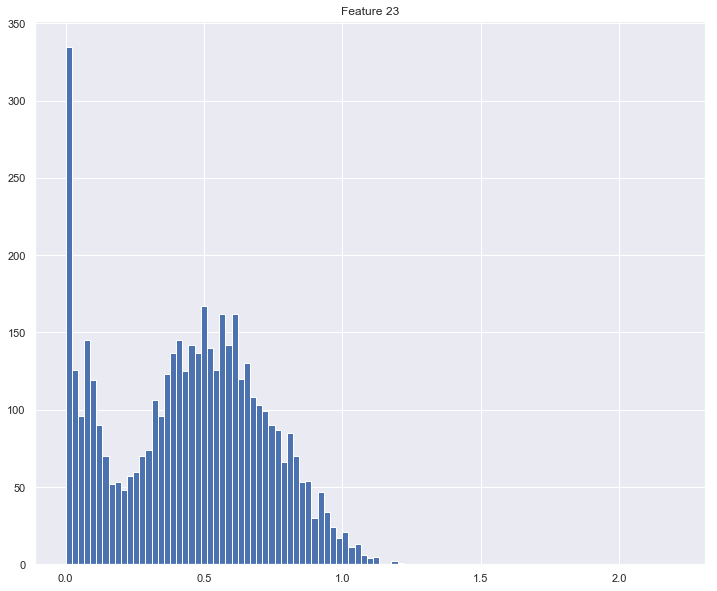

In [50]:
scProject.viz.patternWeightDistribution(dataset_filtered, 'GV01', [4, 23], obsColumn='CellType', subset=['Excitatory Neurons'], numBins=100)




In [56]:
glia= dataset_filtered[dataset_filtered.obs['CellType'].isin(['Excitatory Neurons'])]
# We are now going to construct two clusters of microglia based on feature expression of 5
C1 = glia[glia.obsm['GV01'][:, 22] > .3]
C2 = glia[glia.obsm['GV01'][:, 22] <= .3]

C1.X = np.log1p(C1.X) #log transform for statistical tests
C2.X = np.log1p(C2.X) #log transform for statistcal tests

# In order to do the regression we had to filter genes, but now we are going to use the whole feature map
AllGenes = dataset[dataset.obs['CellType'].isin(['Excitatory Neurons'])]
# transfer regression insights
AllGenes.obsm['GV01'] = glia.obsm['GV01']

cluster1 = AllGenes[glia.obsm['GV01'][:, 22] > .3]
cluster2 = AllGenes[glia.obsm['GV01'][:, 22] <=.3]

cluster1.X = np.log1p(cluster1.X) #log transform for stats
cluster2.X = np.log1p(cluster2.X)

print(cluster1.shape, cluster2.shape)

(3224, 1000) (30454, 1000)


In [57]:
scProject.stats.featureExpressionSig(C1, 'GV01', 4, .99999999999)

We can reject the null hypothesis that the mean is 0.


(ArrayView(20.15985733), 6.73000873724392)

In [58]:
scProject.stats.HotellingT2(C1, C2)

T2 Value: 406590.4089939406 FValue: 1156.324342770035 P-Value: 1.1102230246251565e-16


(ArrayView([[406590.40899394]]),
 ArrayView([[1156.32434277]]),
 array([[1.11022302e-16]]))

C1 is dense
C2 is dense


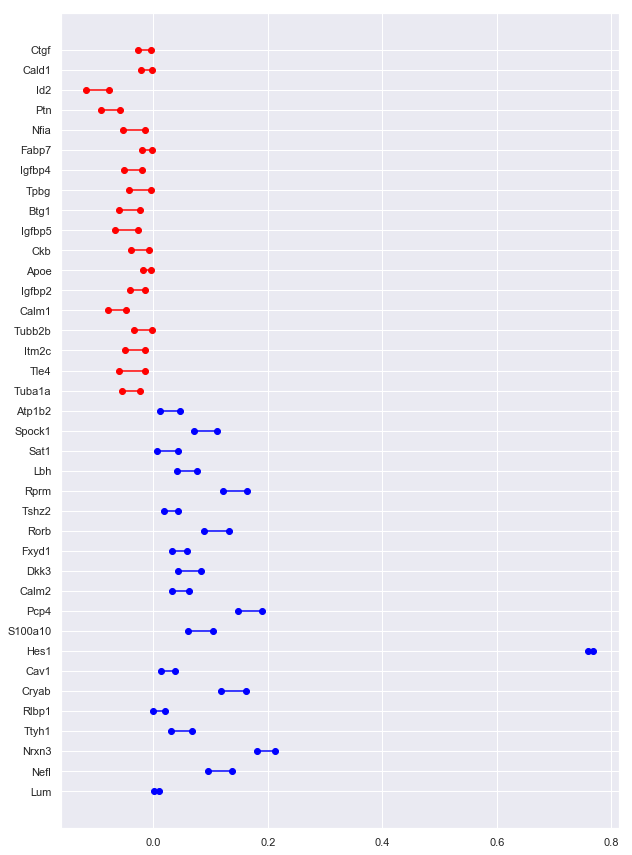

                      Low      High
gene_short_name                    
Lum              0.001732  0.009402
Tuba1a          -0.055109 -0.022752
Tle4            -0.059497 -0.014866
Itm2c           -0.048933 -0.014518
Tubb2b          -0.033470 -0.002041
Calm1           -0.079743 -0.047871
Igfbp2          -0.040123 -0.014680
Apoe            -0.018987 -0.003820
Nefl             0.094901  0.137029
Nrxn3            0.180535  0.212113
Ttyh1            0.030466  0.067397
Ckb             -0.038277 -0.008488
Igfbp5          -0.067385 -0.026088
Rlbp1            0.000014  0.020810
Cryab            0.118187  0.160974
Btg1            -0.060896 -0.024258
Cav1             0.013498  0.037197
Hes1             0.759536  0.768782
Tpbg            -0.042188 -0.004984
S100a10          0.061304  0.104543
Igfbp4          -0.051309 -0.019648
Fabp7           -0.019468 -0.001823
Nfia            -0.053687 -0.013918
Pcp4             0.148640  0.190489
Calm2            0.032767  0.061371
Dkk3             0.042878  0

In [59]:
plt.rcParams['figure.figsize']= [10,15]
df=scProject.stats.projectionDriver(patterns_filtered, C1, C2,.95,'gene_short_name', 96)

print(df[0])